In [1]:
import sklearn
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from flaml import AutoML
import matplotlib.pyplot as plt

In [2]:
summary_data_path = './summary_data_modified.csv'

In [3]:
data = pd.read_csv(summary_data_path,header=0)

In [4]:
X_headers = data.columns.values[2::]
Y_headers = data.columns.values[0]
print(X_headers, Y_headers)

['Diffusion coefficient' 'Inoculation ratio of S. cerevisiae'
 'Bacteriocin resistance' 'Upper bound of Fe3+ uptake rate'
 'Upper bound of Fe2+ uptake rate' 'Dissolved oxygen'] E. coli Average abundance


In [5]:
Y_summary=np.array(data['E. coli Average abundance'])
X_summary=data.drop(['E. coli Average abundance', 'S. cerevisiae Average abundance'],axis=1)
X_summary=np.array(X_summary)

In [6]:
set_config(display='diagram') ## 展示Piline图
imputer = SimpleImputer()
standardizer = StandardScaler()
automl_competitive_m8 = AutoML()
'''
automl_pipeline = Pipeline([
    ("imputuer",imputer),
    ("standardizer", standardizer),
    ("automl", automl)
])
automl_pipeline
'''

'\nautoml_pipeline = Pipeline([\n    ("imputuer",imputer),\n    ("standardizer", standardizer),\n    ("automl", automl)\n])\nautoml_pipeline\n'

In [7]:
'''
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics can be chosen from: ['accuracy','roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'f1','log_loss','mae','mse','r2']
    "task": 'regression',  # task type   
    "estimator_list":['xgboost'],
    "log_file_name": 'airlines_experiment.log',  # flaml log file
}
'''
'''
settings = {
    "time_budget": 10,  # 总时间上限(单位秒)
    "metric": 'rmse',  # 候选可以是: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # 任务类型
    "log_file_name": 'airlines_experiment.log',  # flaml日志文件
    "seed": 1000,
}
'''

settings = {
    "time_budget": 10,  # in seconds
    "metric": 'r2',
    "task": 'regression'
}

In [8]:
'''
automl_pipeline.fit(X_train, Y_train, 
                        automl__time_budget=settings['time_budget'],
                        automl__metric=settings['metric'],
                        automl__estimator_list=settings['estimator_list'],
                        automl__log_training_metric=True)
'''
automl_competitive_m8.fit(X_train=X_summary, y_train=Y_summary, **settings)

[flaml.automl: 05-09 16:18:59] {2600} INFO - task = regression
[flaml.automl: 05-09 16:18:59] {2602} INFO - Data split method: uniform
[flaml.automl: 05-09 16:18:59] {2605} INFO - Evaluation method: cv
[flaml.automl: 05-09 16:18:59] {2727} INFO - Minimizing error metric: 1-r2
[flaml.automl: 05-09 16:18:59] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 05-09 16:18:59] {3174} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-09 16:18:59] {3307} INFO - Estimated sufficient time budget=328s. Estimated necessary time budget=3s.
[flaml.automl: 05-09 16:18:59] {3354} INFO -  at 0.1s,	estimator lgbm's best error=0.6626,	best estimator lgbm's best error=0.6626
[flaml.automl: 05-09 16:18:59] {3174} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-09 16:18:59] {3354} INFO -  at 0.1s,	estimator lgbm's best error=0.6626,	best estimator lgbm's best error=0.6626
[flaml.automl: 05-09 16:18:59] {3

[flaml.automl: 05-09 16:19:01] {3174} INFO - iteration 36, current learner extra_tree
[flaml.automl: 05-09 16:19:01] {3354} INFO -  at 1.6s,	estimator extra_tree's best error=0.3752,	best estimator lgbm's best error=0.3563
[flaml.automl: 05-09 16:19:01] {3174} INFO - iteration 37, current learner lgbm
[flaml.automl: 05-09 16:19:01] {3354} INFO -  at 1.7s,	estimator lgbm's best error=0.3563,	best estimator lgbm's best error=0.3563
[flaml.automl: 05-09 16:19:01] {3174} INFO - iteration 38, current learner xgboost
[flaml.automl: 05-09 16:19:01] {3354} INFO -  at 1.7s,	estimator xgboost's best error=0.4177,	best estimator lgbm's best error=0.3563
[flaml.automl: 05-09 16:19:01] {3174} INFO - iteration 39, current learner lgbm
[flaml.automl: 05-09 16:19:01] {3354} INFO -  at 1.7s,	estimator lgbm's best error=0.3563,	best estimator lgbm's best error=0.3563
[flaml.automl: 05-09 16:19:01] {3174} INFO - iteration 40, current learner rf
[flaml.automl: 05-09 16:19:01] {3354} INFO -  at 1.8s,	estim

[flaml.automl: 05-09 16:19:05] {3354} INFO -  at 5.7s,	estimator xgboost's best error=0.4177,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:05] {3174} INFO - iteration 76, current learner lgbm
[flaml.automl: 05-09 16:19:05] {3354} INFO -  at 5.7s,	estimator lgbm's best error=0.3563,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:05] {3174} INFO - iteration 77, current learner lgbm
[flaml.automl: 05-09 16:19:05] {3354} INFO -  at 5.8s,	estimator lgbm's best error=0.3563,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:05] {3174} INFO - iteration 78, current learner catboost
[flaml.automl: 05-09 16:19:05] {3354} INFO -  at 6.1s,	estimator catboost's best error=0.3934,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:05] {3174} INFO - iteration 79, current learner lgbm
[flaml.automl: 05-09 16:19:05] {3354} INFO -  at 6.1s,	estimator lgbm's best error=0.3563,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:

[flaml.automl: 05-09 16:19:08] {3354} INFO -  at 8.6s,	estimator extra_tree's best error=0.3752,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:08] {3174} INFO - iteration 115, current learner lgbm
[flaml.automl: 05-09 16:19:08] {3354} INFO -  at 8.6s,	estimator lgbm's best error=0.3563,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:08] {3174} INFO - iteration 116, current learner lgbm
[flaml.automl: 05-09 16:19:08] {3354} INFO -  at 8.6s,	estimator lgbm's best error=0.3563,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:08] {3174} INFO - iteration 117, current learner xgboost
[flaml.automl: 05-09 16:19:08] {3354} INFO -  at 8.7s,	estimator xgboost's best error=0.3873,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16:19:08] {3174} INFO - iteration 118, current learner rf
[flaml.automl: 05-09 16:19:08] {3354} INFO -  at 8.8s,	estimator rf's best error=0.3299,	best estimator rf's best error=0.3299
[flaml.automl: 05-09 16

In [9]:
'''
automl = automl_pipeline.steps[2][1]

## 
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
'''

print('Best ML leaner:', automl_competitive_m8.best_estimator)
print('Best hyperparmeter config:', automl_competitive_m8.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl_competitive_m8.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl_competitive_m8.best_config_train_time))

Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 6, 'max_features': 0.7447690109008432, 'max_leaves': 9}
Best accuracy on validation data: 0.6701
Training duration of best run: 0.02544 s


In [10]:
'''
automl.model

import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

Y_pred = automl_pipeline.predict(X_test)
print('Predicted labels', Y_pred)
print('True labels', Y_test)
Y_pred_proba = automl_pipeline.predict_proba(X_test)[:,1]
print('Predicted probas ',Y_pred_proba[:5])
'''
automl_competitive_m8.model.estimator
###automl_TP1 0.49

RandomForestRegressor(max_features=0.7447690109008432, max_leaf_nodes=9,
                      n_estimators=6, n_jobs=-1)

In [11]:
import pickle
with open('automl_competitive_m8.pkl', 'wb') as f:
    pickle.dump(automl_competitive_m8, f, pickle.HIGHEST_PROTOCOL)

# 模型加载
# automl_2 extra_tree
with open('automl_competitive_m7.pkl', 'rb') as f:
    automl = pickle.load(f)
    print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
    print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
    print(automl.model.estimator)

Best accuracy on validation data: 0.6804
Training duration of best run: 0.03039 s
RandomForestRegressor(max_features=0.8089300234965588, max_leaf_nodes=11,
                      n_estimators=5, n_jobs=-1)


[0.01115384 0.82974754 0.02933626 0.01378443 0.01203254 0.10394539]


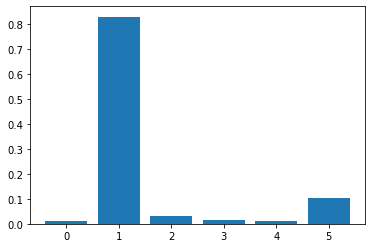

In [12]:
# plot feature importance manually
from matplotlib import pyplot
print(automl.feature_importances_)
# plot
pyplot.bar(range(len(automl.feature_importances_)), automl.feature_importances_)
pyplot.show()

Using 138 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/138 [00:00<?, ?it/s]

[[-3.29681993e-04 -1.24781802e-02 -3.65962200e-04 -2.53689711e-04
   2.65819983e-04 -2.61968258e-03]
 [-3.76504868e-04 -6.33254675e-03 -2.86034388e-04 -3.85016450e-05
   4.67618044e-04 -3.68464930e-03]
 [-1.43006206e-03  8.50121648e-04 -5.26178606e-04  2.60873402e-06
  -1.70535641e-04 -3.23234987e-04]
 [-3.73477660e-04  1.55771305e-02 -1.34475248e-03  4.61634083e-04
   1.27987167e-04  1.08124578e-03]
 [ 3.28418010e-04 -1.17984841e-02 -6.37766717e-04 -2.53689711e-04
   5.94191662e-04 -1.34980556e-03]
 [-3.29681993e-04 -1.24820091e-02 -3.84725508e-04 -2.53689711e-04
   4.67618044e-04 -1.42871708e-03]
 [-1.54946487e-03  1.13951622e-02 -6.04660697e-04  4.61634083e-04
   1.99889334e-04  1.51919535e-03]
 [-3.76504868e-04 -6.70245022e-03 -2.78529064e-04 -3.85016450e-05
   9.02563725e-05 -3.46142612e-03]
 [-3.29681993e-04 -1.34401996e-02 -3.84725508e-04 -2.53689711e-04
   4.67618044e-04 -4.70526578e-04]
 [ 3.48992573e-04  3.48710198e-03 -5.20306337e-04 -2.67526149e-05
   3.25418193e-04  9.8059

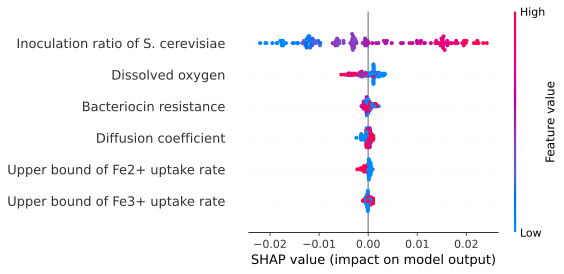

In [13]:
import sys
import pydot
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn import metrics
from openpyxl import load_workbook
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
import shap
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', dpi=300)
Y=Y_summary
X=X_summary
X=pd.DataFrame(X, columns = X_headers)
shap.initjs()
explainer = shap.KernelExplainer(automl.predict, X)
shap_values = explainer.shap_values(X) * -1
explanation = shap.Explanation(shap_values, data=X, base_values=explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values, X)
shap.summary_plot(shap_values, X, show = False)
plt.savefig('scere.svg', bbox_inches='tight', dpi=300)
#shap.summary_plot(shap_values, X, plot_type="bar")
print(shap_values)